# Purpose

The purpose of this notebook is to create a model which is capable of classifying our various types of potato chips.

# Let's start by creating a training and test set.

In [27]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [73]:
datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.5,
    height_shift_range=0.5,
    rescale=1./255,
    shear_range=0.5,
    zoom_range=0.5,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

In [74]:
!ls custom_dataset/classes/

cheetos		coolranch_bg.jpg    original	    sourcream
cheetos_bg.jpg	nachocheese	    popcorn	    sourcream_bg.jpg
coolranch	nachocheese_bg.jpg  popcorn_bg.jpg


In [115]:
img = load_img('custom_dataset/classes/nachocheese/10.jpg')

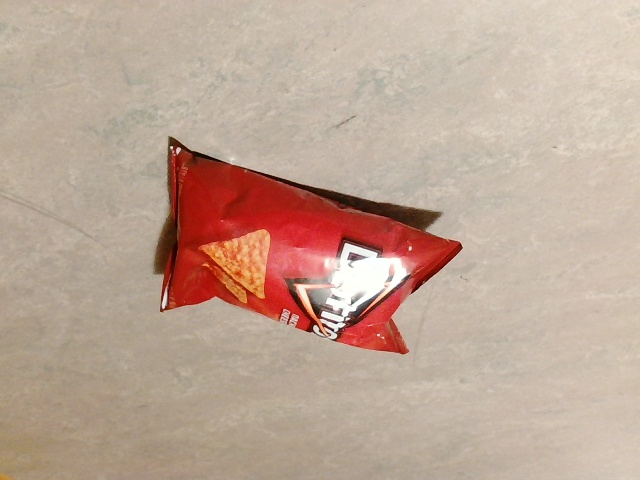

In [116]:
img

In [117]:
x = img_to_array(img)

In [118]:
x = x.reshape((1,) + x.shape)

In [119]:
x

array([[[[185., 173., 151.],
         [186., 174., 152.],
         [186., 174., 152.],
         ...,
         [228., 212., 196.],
         [229., 212., 196.],
         [231., 214., 196.]],

        [[186., 174., 152.],
         [187., 175., 153.],
         [188., 176., 154.],
         ...,
         [230., 214., 199.],
         [229., 212., 196.],
         [228., 211., 193.]],

        [[188., 176., 154.],
         [189., 177., 155.],
         [190., 178., 156.],
         ...,
         [230., 217., 201.],
         [229., 213., 197.],
         [226., 210., 194.]],

        ...,

        [[184., 132.,  49.],
         [186., 133.,  53.],
         [187., 136.,  57.],
         ...,
         [213., 199., 186.],
         [213., 199., 186.],
         [214., 200., 187.]],

        [[184., 127.,  40.],
         [187., 131.,  44.],
         [191., 135.,  50.],
         ...,
         [214., 200., 187.],
         [214., 200., 187.],
         [214., 200., 187.]],

        [[183., 124.,  34.],
       

In [157]:
x.shape

(1, 480, 640, 3)

In [120]:
!rm -r preview
!mkdir preview

In [121]:
i = 0

In [122]:
for batch in datagen.flow(x, batch_size=1, save_to_dir='preview', save_format="jpeg"):
    i += 1
    if i > 20:
        break

In [123]:
!ls preview

_0_1117.jpeg  _0_3296.jpeg  _0_5249.jpeg  _0_6955.jpeg	_0_9871.jpeg
_0_1290.jpeg  _0_350.jpeg   _0_5776.jpeg  _0_7063.jpeg
_0_1987.jpeg  _0_3945.jpeg  _0_5807.jpeg  _0_853.jpeg
_0_298.jpeg   _0_5197.jpeg  _0_6667.jpeg  _0_9278.jpeg
_0_3018.jpeg  _0_5216.jpeg  _0_6717.jpeg  _0_9654.jpeg


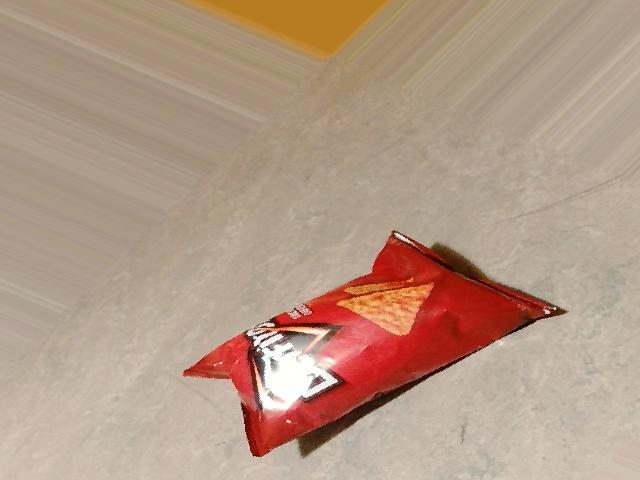

In [125]:
load_img("preview/_0_1117.jpeg")

In [126]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [158]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(x.shape[1], x.shape[2], x.shape[3])))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(6))
model.add(Activation('softmax'))

In [159]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [160]:
batch_size = 1

In [161]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True)

In [162]:
x.shape

(1, 480, 640, 3)

In [163]:
!ls custom_dataset/classes/

cheetos		coolranch_bg.jpg    original	    sourcream
cheetos_bg.jpg	nachocheese	    popcorn	    sourcream_bg.jpg
coolranch	nachocheese_bg.jpg  popcorn_bg.jpg


In [175]:
train_generator = train_datagen.flow_from_directory("custom_dataset/classes", batch_size=batch_size, class_mode="categorical", target_size=(x.shape[1], x.shape[2]))

Found 285 images belonging to 6 classes.


In [176]:
val_generator = train_datagen.flow_from_directory("custom_dataset/classes", batch_size=batch_size, class_mode="categorical", target_size=(x.shape[1], x.shape[2]))

Found 285 images belonging to 6 classes.


In [177]:
train_generator.filenames

['cheetos/0.jpg',
 'cheetos/1.jpg',
 'cheetos/10.jpg',
 'cheetos/11.jpg',
 'cheetos/12.jpg',
 'cheetos/13.jpg',
 'cheetos/14.jpg',
 'cheetos/15.jpg',
 'cheetos/16.jpg',
 'cheetos/17.jpg',
 'cheetos/18.jpg',
 'cheetos/19.jpg',
 'cheetos/2.jpg',
 'cheetos/20.jpg',
 'cheetos/21.jpg',
 'cheetos/22.jpg',
 'cheetos/23.jpg',
 'cheetos/24.jpg',
 'cheetos/25.jpg',
 'cheetos/26.jpg',
 'cheetos/27.jpg',
 'cheetos/28.jpg',
 'cheetos/29.jpg',
 'cheetos/3.jpg',
 'cheetos/30.jpg',
 'cheetos/31.jpg',
 'cheetos/32.jpg',
 'cheetos/33.jpg',
 'cheetos/34.jpg',
 'cheetos/35.jpg',
 'cheetos/36.jpg',
 'cheetos/37.jpg',
 'cheetos/38.jpg',
 'cheetos/39.jpg',
 'cheetos/4.jpg',
 'cheetos/40.jpg',
 'cheetos/41.jpg',
 'cheetos/42.jpg',
 'cheetos/43.jpg',
 'cheetos/44.jpg',
 'cheetos/45.jpg',
 'cheetos/46.jpg',
 'cheetos/47.jpg',
 'cheetos/5.jpg',
 'cheetos/7.jpg',
 'cheetos/8.jpg',
 'cheetos/9.jpg',
 'coolranch/0.jpg',
 'coolranch/1.jpg',
 'coolranch/10.jpg',
 'coolranch/11.jpg',
 'coolranch/12.jpg',
 'coolranch/1

In [ ]:
model.fit_generator(train_generator, epochs=5000, steps_per_epoch=100, validation_data=val_generator)

Epoch 1/5000
100/100 [==============================] - 9s 93ms/step - loss: 13.5077 - acc: 0.1400 - val_loss: 13.5731 - val_acc: 0.1579
Epoch 2/5000
100/100 [==============================] - 9s 90ms/step - loss: 2.9859 - acc: 0.2400 - val_loss: 1.5249 - val_acc: 0.4737
Epoch 3/5000
100/100 [==============================] - 9s 92ms/step - loss: 1.3966 - acc: 0.4600 - val_loss: 1.0862 - val_acc: 0.6737
Epoch 4/5000
100/100 [==============================] - 9s 90ms/step - loss: 1.3169 - acc: 0.5100 - val_loss: 0.8694 - val_acc: 0.7439
Epoch 5/5000
100/100 [==============================] - 9s 90ms/step - loss: 1.0386 - acc: 0.6600 - val_loss: 0.7218 - val_acc: 0.8000
Epoch 6/5000
 85/100 [========================>.....] - ETA: 0s - loss: 1.0539 - acc: 0.6235

In [169]:
train_generator.class_indices

{'cheetos': 0,
 'coolranch': 1,
 'nachocheese': 2,
 'original': 3,
 'popcorn': 4,
 'sourcream': 5}

In [171]:
import numpy as np

In [172]:
np.argmax(model.predict(x))

3

In [17]:
!ls

Chips in Keras.ipynb            color_detection.ipynb
aruco_tag_notebook.ipynb        predict.jpg
background_subtraction_tv.ipynb preview
chips_pictures                  weights.h5


In [ ]:
del img

In [ ]:
img = load_img("predict.jpg")

In [ ]:
img

In [ ]:
x = img_to_array(img)

In [ ]:
import numpy as np

In [ ]:
model.predict_proba(np.expand_dims(x, axis=0))

In [ ]:
train_generator.class_indices

In [ ]:
model.predict

In [ ]:
!ls chips_pictures/